# Capitec

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("ClientBehaviourTraining.txt", sep = "|")

In [9]:
df.head(3)

,ClientIdentifier,Behaviour_Date_Key,BehaviourType,TAB1,TAB5,TAB7,TAB8,TAB9,TAB10,Total_Num_Inflow_L3M,...,Num_Elec,Amt_Elec,Num_Airtime,Amt_Airtime,CW1,CS1,CS2,CS3,CS4,InsufFunds
0,2179666,11518,VirtualCardNoTake-up,0.0,0.0,2.0,1.0,1.0,0.0,48.0,...,1.0,-100.0,1.0,-20.0,0.5326,1.0,0.0,9.0,0.1322,4.0
1,320818,11518,CreditCardTake-up,0.0,0.0,12.0,9.0,8.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0
2,302372,11518,CreditCardTake-up,0.0,0.0,2.0,2.0,2.0,0.0,16.0,...,0.0,0.0,0.0,0.0,-99.0000,3.0,3.0,3.0,0.8275,0.0


In [10]:
df.nunique()

ClientIdentifier      408332
Behaviour_Date_Key       123
BehaviourType             18
TAB1                       2
TAB5                       2
                       ...  
CS1                       27
CS2                       28
CS3                       40
CS4                    17221
InsufFunds                69
Length: 81, dtype: int64

In [11]:
df.shape

(447552, 81)

In [12]:
df.columns


Index(['ClientIdentifier', 'Behaviour_Date_Key', 'BehaviourType', 'TAB1',
       'TAB5', 'TAB7', 'TAB8', 'TAB9', 'TAB10', 'Total_Num_Inflow_L3M',
       'Total_Amt_Inflow_L3M', 'Total_Num_Outflow_L3M',
       'Total_Amt_Outflow_L3M', 'Num_Inflow_G1_L3M', 'Num_MoneySend_In_G1_L3M',
       'Num_Elec_In_G1_L3M', 'Num_Pmt_In_G1_L3M', 'Num_CW_ATM_Out_G1_L3M',
       'Num_EDO_Out_G1_L3M', 'Num_POS_Out_G1_L3M', 'Num_Loan_Out_G1_L3M',
       'Num_SO_Out_G1_L3M', 'Num_Prepaid_Out_G1_L3M', 'Num_RTC_Out_G1_L3M',
       'Num_CNP_Out_G1_L3M', 'Num_Pmt_Out_G1_L3M', 'Amt_Outflow_G1_L3M',
       'Amt_CW_ATM_Out_G1_L3M', 'Amt_EDO_Out_G1_L3M', 'Amt_POS_Out_G1_L3M',
       'Amt_Loan_Out_G1_L3M', 'Amt_SO_Out_G1_L3M', 'Amt_Prepaid_Out_G1_L3M',
       'Amt_RTC_Out_G1_L3M', 'Amt_CNP_Out_G1_L3M', 'Amt_Pmt_Out_G1_L3M',
       'Num_Outflow_CC_L3M', 'Amt_Outflow_CC_L3M', 'Num_POS_Out_CC_L3M',
       'Amt_POS_Out_CC_L3M', 'MinBalanceL3M', 'MinBalanceAVG', 'MaxBalanceL3M',
       'MaxBalanceAVG', 'ALL_Val_Cur_Mth_

In [13]:
df.MaxBalanceAVG.dropna().describe().round(3)

count     438901.000
mean        5960.674
std        33313.698
min       -38982.263
25%          567.467
50%         1851.703
75%         4728.063
max      4516269.583
Name: MaxBalanceAVG, dtype: float64

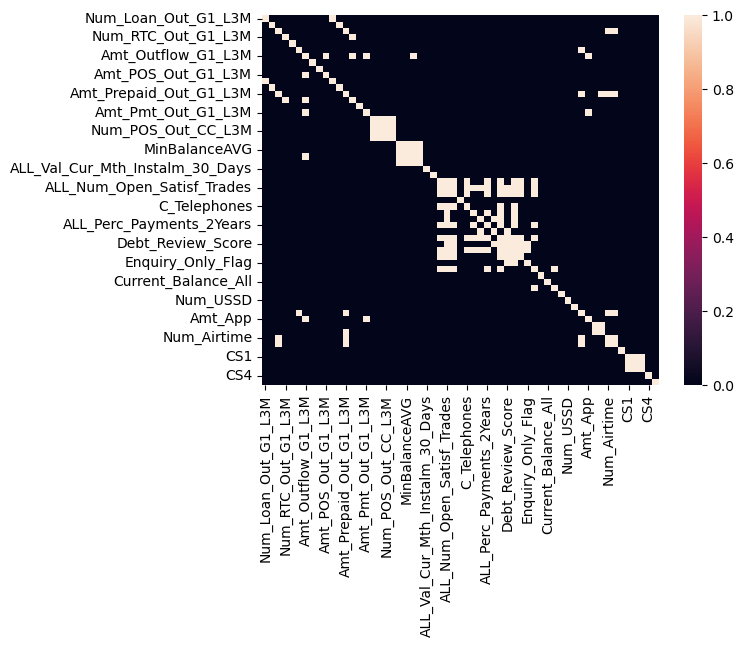

In [14]:
sns.heatmap(abs(df.iloc[:,20:].corr())>0.5)
plt.show()

In [15]:
df.BehaviourType.value_counts()


CardUserNoTake-up              25000
AppTake-up                     25000
CardUserTake-up                25000
DebitOrderNoTake-up            25000
BankingNoTake-up               25000
AppNoTake-up                   25000
BankingTake-up                 24999
SavingsNoTake-up               24999
CreditCardTake-up              24998
VirtualCardTake-up             24969
CreditCardNoTake-up            24962
FinancialEducationTake-up      24928
FinancialEducationNoTake-up    24927
SavingTake-up                  24914
VirtualCardNoTake-up           24854
LoanNoTake-up                  24793
LoanTake-up                    24525
DebitOrderTake-up              23684
Name: BehaviourType, dtype: int64

In [150]:
import statsmodels.api as smf
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import *
import seaborn as sns

# PCA

In [44]:
dfno = df.dropna()
dfno = dfno.select_dtypes(exclude=['object'])

In [45]:
ncomps = 40

pdf = df.drop(columns= ["Instalment_Amt_All", "Current_Balance_All"]).dropna()
pdf = pdf.select_dtypes(include=('float64', 'int64'))
pdf = pd.DataFrame(StandardScaler().fit_transform(pdf))

In [46]:
pca = PCA(n_components=ncomps)
red = pca.fit(pdf)

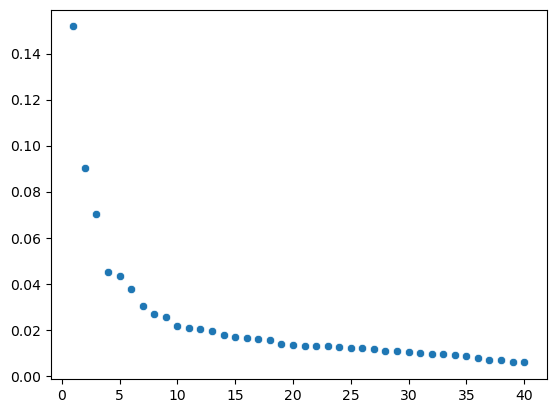

In [47]:
x = np.arange(1, ncomps+1, 1)
y = red.explained_variance_ratio_
sns.scatterplot(x=x, y=y)
plt.show()

In [48]:
scores = red.transform(pdf)

In [49]:
scores_df = pd.DataFrame(scores)

In [50]:
print(red.explained_variance_ratio_.sum())

0.9136906379576527


- #missing vals

In [170]:
df.shape

(233505, 81)

In [53]:
df.dropna().shape


(253496, 81)

In [54]:
df.drop(columns= ["Instalment_Amt_All", "Current_Balance_All"]).dropna().shape

(375215, 79)

In [124]:
le = LabelEncoder()
dup = df.dropna()
d = le.fit_transform(dup.BehaviourType)
dup = dup.select_dtypes(exclude=('object'))
d_train, d_test, t_train, t_test = train_test_split(dup, d, test_size=0.30, random_state=42)
# dup["BehaviourType"] = pd.Series(d)
# print(d.shape)
# print(dup.shape)

In [165]:
clf = RandomForestClassifier(max_depth=6, random_state=0)
clf.fit(d_train, t_train)


RandomForestClassifier(max_depth=6, random_state=0)

In [166]:
print(t_train)
print(pred)

[10 11  4 ...  8 15  6]
[ 0 12 16 ... 16  0 16]


<AxesSubplot:>

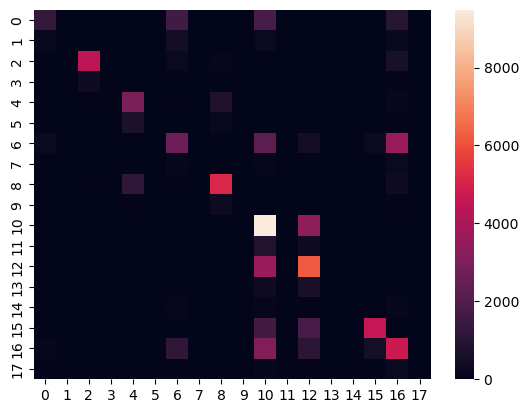

In [167]:
pred = clf.predict(d_train)
# print(pred.shape)
# print(t_test.shape)
cf = confusion_matrix(y_true=t_train, y_pred=pred)
sns.heatmap(cf)

<AxesSubplot:>

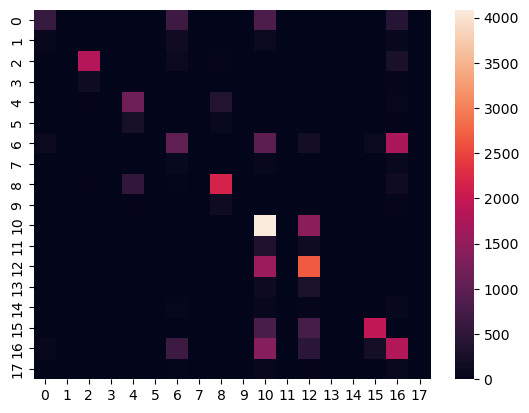

In [168]:
pred = clf.predict(d_test)
# print(pred.shape)
# print(t_test.shape)
cf = confusion_matrix(y_true=t_test, y_pred=pred)
sns.heatmap(cf)

# Binary classification 

### Imports

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [4]:
#current directory contents
!ls

ClientBehaviourEvaluation (1).txt  Untitled.ipynb
ClientBehaviourTraining.txt


In [5]:
main_df = pd.read_csv("ClientBehaviourTraining.txt", sep="|")

In [6]:
main_df.shape

(447552, 81)

In [7]:
modf = main_df.drop(columns= ["Instalment_Amt_All", "Current_Balance_All", "Behaviour_Date_Key", "ClientIdentifier"]).dropna()
modf.shape

(375215, 77)

In [8]:
modf.BehaviourType.value_counts()

LoanTake-up                    24050
CreditCardTake-up              23951
LoanNoTake-up                  23665
DebitOrderTake-up              22734
SavingTake-up                  22685
VirtualCardTake-up             22638
BankingTake-up                 22524
FinancialEducationTake-up      22010
FinancialEducationNoTake-up    21963
DebitOrderNoTake-up            21597
CreditCardNoTake-up            21147
AppTake-up                     21044
VirtualCardNoTake-up           20908
CardUserTake-up                19636
SavingsNoTake-up               18615
AppNoTake-up                   16976
BankingNoTake-up               16352
CardUserNoTake-up              12720
Name: BehaviourType, dtype: int64

- Potential issue with skewness

### subsetting data for binary classification

In [9]:
def subset(type_subset) -> pd.DataFrame:
    if type_subset == "Saving":
        new_df = modf[(modf.BehaviourType == type_subset+"Take-up") | (modf.BehaviourType == type_subset+"sNoTake-up")]
        return new_df
    new_df = modf[(modf.BehaviourType == type_subset+"Take-up") | (modf.BehaviourType == type_subset+"NoTake-up")]
    return new_df

In [10]:
loan_df = subset("Loan")
creditcard_df = subset("CreditCard")
debitorder_df = subset("DebitOrder")
saving_df = subset("Saving")
banking_df = subset("Banking")
fed_df = subset("FinancialEducation")
app_df = subset("App")
virtualcard_df = subset("VirtualCard")
carduser_df = subset("CardUser")

### Binary Subset class

This is a class that is designed to store information pertaining to each of the nine subsets of the data. This makes for a more modular approach to comparing models and as a result code reusibility increases.

In [11]:
class BinarySubset():

    _name = None
    _df = None
    _X_train = None
    _X_test = None
    _y_train = None
    _y_test = None
    _target = None
    _scaled = None
    _pca_data = None
    _model = None
    _predictions = None
    _classification_report = None
    _roc_curve = None
    
    def __init__(self, data, name):
        self._name = name
        self._df= data
        self._target = self.create_target()
        self._scaled = self.scale_df()
        self.create_train_test_split()
        
    def create_target(self) -> np.array:
        target = LabelEncoder().fit_transform(self._df.BehaviourType)
        return target
    
    def scale_df(self) -> pd.DataFrame:
        cols = self._df.select_dtypes(include=("float64", "int64")).columns
        ldscaled = StandardScaler().fit_transform(self._df.select_dtypes(include=("float64", "int64")))
        ldscaled = pd.DataFrame(ldscaled, columns=cols)
        return ldscaled
    
    def create_train_test_split(self):
        self._X_train, self._X_test, self._y_train, self._y_test = train_test_split(self._scaled, self._target,
                                                    test_size=0.10, random_state=21)
    def fit_LogisticRegression(self, X, y):
        self._model = LogisticRegression(max_iter=300)
        self._model.fit(X, y)
    
    def fit_KNN(self, X, y):
        self._model = KNeighborsClassifier(n_neighbors=1)
        self._model.fit(X, y)
        
    def fit_svm(self, X, y):
        self._model = SVC(max_iter=10000)
        self._model.fit(X, y)
    
    def fit_dt(self, X, y):
        self._model = DecisionTreeClassifier(max_depth=7)
        self._model.fit(X, y)
        
    def fit_nb(self, X, y):
        self._model = GaussianNB()
        self._model.fit(X, y)
    
    def predict(self, X):
        self._predictions = self._model.predict(X)
        self.classification_report()
        self.roc_curve()
    
    def classification_report(self):
        self._classification_report = classification_report(y_true=self._y_train, y_pred=self._predictions)
    
    def roc_curve(self):
        self._roc_curve = roc_curve(y_true=self._y_train, y_score=self._predictions)
    
    def print_roc(self):
        fpr, tpr, _ = self._roc_curve
        plt.plot(fpr,tpr)
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
    
    def pca_fit_transform(self, explained_var):
        '''
        INPUT: n in range(0,1) that represents the amount of variance you would like to keep
        '''
        i = 0
        var = 0
        cols = list()
        while var < explained_var:
            if i != 0: cols.append(f"PC{i}")
            pca = PCA(n_components=i).fit(self._scaled)
            var = np.sum(pca.explained_variance_ratio_)
            i = i + 1       
        self._pca_data  = pd.DataFrame(pca.transform(self._scaled), columns=cols)

### Initializing subclasses and utility functions

In [12]:
dataframes = [loan_df, creditcard_df, debitorder_df, saving_df,
                  banking_df, fed_df, app_df, virtualcard_df, carduser_df]
names = ["LoanTake-up", "CreditCardTake-up", "DebitOrderTake-up", "SavingTake-up",
                  "BankingTake-up","FinancialEducationTake-up", "AppTake-up",
         "VirtualCardTake-up", "CardUserTake-up"]

subsets = [BinarySubset(data=dataframes[i],
                        name=names[i]) for i in range(len(dataframes))]

def print_roc():
    plt.figure()
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    for i in subsets:
        fpr, tpr, _ = i._roc_curve
        plt.plot(fpr,tpr, label = i._name)

    plt.legend()
    plt.show()

def print_class_rep():
    for i in subsets:
        print(i._name+"\n"+i._classification_report)

## Logistic Regression 

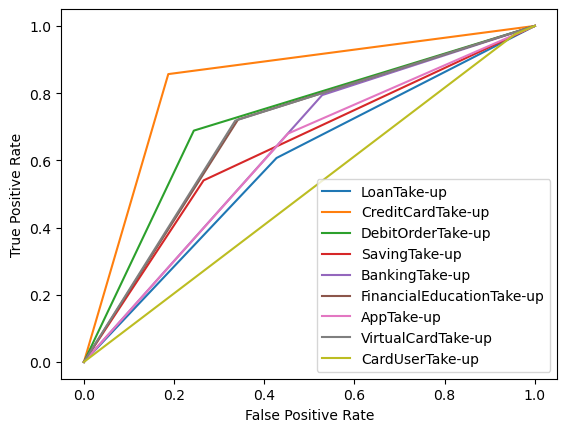

LoanTake-up
              precision    recall  f1-score   support

           0       0.59      0.57      0.58     21306
           1       0.59      0.61      0.60     21637

    accuracy                           0.59     42943
   macro avg       0.59      0.59      0.59     42943
weighted avg       0.59      0.59      0.59     42943

CreditCardTake-up
              precision    recall  f1-score   support

           0       0.83      0.81      0.82     19017
           1       0.84      0.86      0.85     21571

    accuracy                           0.84     40588
   macro avg       0.84      0.83      0.84     40588
weighted avg       0.84      0.84      0.84     40588

DebitOrderTake-up
              precision    recall  f1-score   support

           0       0.70      0.76      0.73     19448
           1       0.75      0.69      0.72     20449

    accuracy                           0.72     39897
   macro avg       0.72      0.72      0.72     39897
weighted avg       0.72   

In [13]:
for i in subsets:
    i.fit_LogisticRegression(i._X_train, i._y_train)
    i.predict(i._X_train)
print_roc()
print_class_rep()

## KNN

In [ ]:
for i in subsets:
    i.fit_KNN(i._X_train, i._y_train)
    i.predict(i._X_train)
print_roc()
print_class_rep()

## Decision Tree

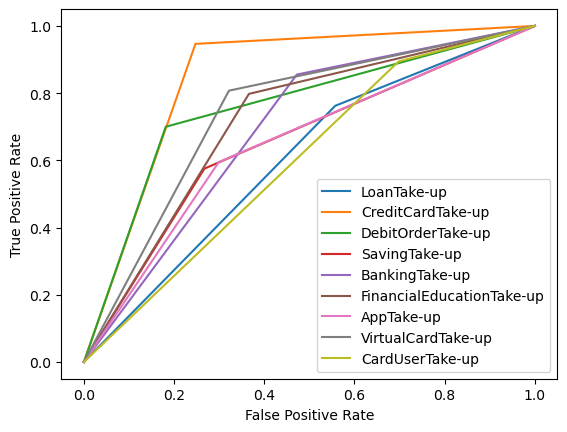

LoanTake-up
              precision    recall  f1-score   support

           0       0.65      0.44      0.53     21306
           1       0.58      0.76      0.66     21637

    accuracy                           0.60     42943
   macro avg       0.61      0.60      0.59     42943
weighted avg       0.61      0.60      0.59     42943

CreditCardTake-up
              precision    recall  f1-score   support

           0       0.93      0.75      0.83     19017
           1       0.81      0.95      0.87     21571

    accuracy                           0.86     40588
   macro avg       0.87      0.85      0.85     40588
weighted avg       0.87      0.86      0.85     40588

DebitOrderTake-up
              precision    recall  f1-score   support

           0       0.72      0.82      0.77     19448
           1       0.80      0.70      0.75     20449

    accuracy                           0.76     39897
   macro avg       0.76      0.76      0.76     39897
weighted avg       0.76   

In [193]:
for i in subsets:
    i.fit_dt(i._X_train, i._y_train)
    i.predict(i._X_train)
print_roc()
print_class_rep()

## Support Vector Machine

In [ ]:
for i in subsets:
    i.fit_svm(i._X_train, i._y_train)
    i.predict(i._X_train)
print_roc()
print_class_rep()

/usr/local/Caskroom/miniconda/base/envs/DS241_p39/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


## Naive Bayes

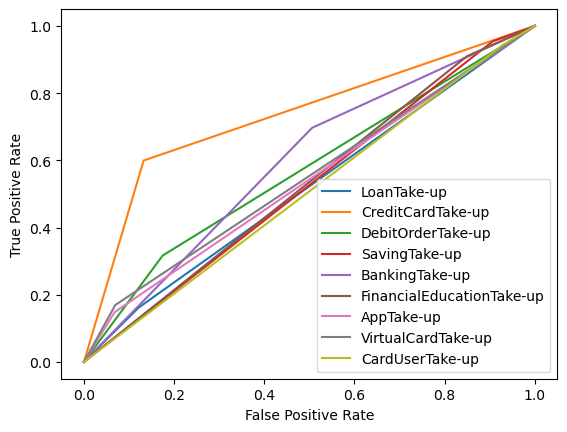

LoanTake-up
              precision    recall  f1-score   support

           0       0.51      0.88      0.64     21306
           1       0.57      0.16      0.25     21637

    accuracy                           0.52     42943
   macro avg       0.54      0.52      0.45     42943
weighted avg       0.54      0.52      0.45     42943

CreditCardTake-up
              precision    recall  f1-score   support

           0       0.66      0.87      0.75     19017
           1       0.84      0.60      0.70     21571

    accuracy                           0.73     40588
   macro avg       0.75      0.73      0.72     40588
weighted avg       0.75      0.73      0.72     40588

DebitOrderTake-up
              precision    recall  f1-score   support

           0       0.53      0.83      0.65     19448
           1       0.66      0.32      0.43     20449

    accuracy                           0.56     39897
   macro avg       0.60      0.57      0.54     39897
weighted avg       0.60   

In [200]:
for i in subsets:
    i.fit_nb(i._X_train, i._y_train)
    i.predict(i._X_train)
print_roc()
print_class_rep()